In [1]:
import numpy as np 
import pandas as pd

from rdkit import Chem
from rdkit.Chem import PandasTools

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.rcParams.update({'font.size': 20})

#### Analyze generated libraries

Import generated libraries as pandas data frames

In [2]:
library_svm = pd.read_csv('data/libraries/svm_library.csv', header=None, names=['ID', 'SMILES'], dtype={'ID': str, 'SMILES': str})
library_mlp = pd.read_csv('data/libraries/mlp_library.csv', header=None, names=['ID', 'SMILES'], dtype={'ID': str, 'SMILES': str})

Analyze intersections of common elements (Venn diagram)

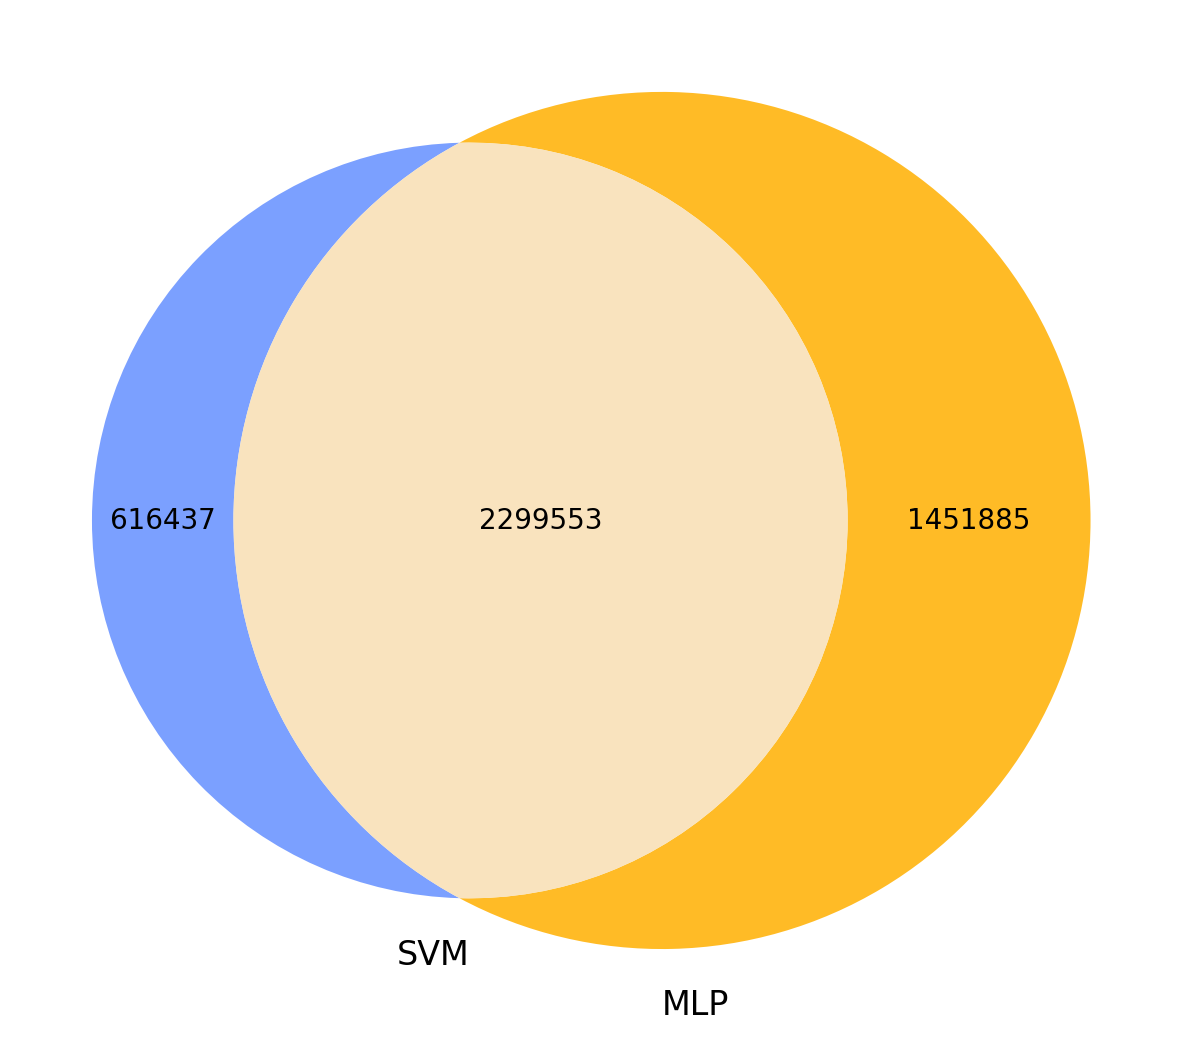

In [3]:
ids_svm = set(library_svm.ID.values.tolist())
ids_mlp = set(library_mlp.ID.values.tolist())

plt.figure(figsize=(15, 15))
venn2(subsets=(ids_svm, ids_mlp), set_labels=('SVM', 'MLP'), set_colors=('#648FFF', '#FFB000'), alpha=0.85)
plt.savefig('plots/venn_SVM_MLP.pdf')

Save intersection

In [4]:
library_svm_mlp = library_svm[library_svm.ID.isin(ids_mlp)]
library_svm_mlp.to_csv('data/libraries/intersection_svm_mlp.csv', index=False)

Select intersection of interest

In [5]:
selection = pd.merge(library_svm, library_mlp, on=['ID', 'SMILES'], how='inner')

Analyse building block usage of selected intersection

In [6]:
library_arenes = pd.read_csv('data/library_arenes.csv', dtype={'ID': str, 'SMILES': str})
library_amines = pd.read_csv('data/library_amines.csv', dtype={'ID': str, 'SMILES': str})
library_aldehydes = pd.read_csv('data/library_aldehydes.csv', dtype={'ID': str, 'SMILES': str})

In [7]:
smiles_selection = selection.SMILES.values.tolist()

bb_selection = []
for smiles in smiles_selection:
    bb_selection.append(smiles.split('.')[0])
    bb_selection.append(smiles.split('.')[1])
    bb_selection.append(smiles.split('.')[2])

bb_unique = np.unique(bb_selection)
bb_unique_mol = [Chem.MolFromSmiles(smiles) for smiles in bb_unique]

arenes_unique = [smiles for smiles in bb_unique if smiles in library_arenes.SMILES.values.tolist()]
amines_unique = [smiles for smiles in bb_unique if smiles in library_amines.SMILES.values.tolist()]
aldehydes_unique = [smiles for smiles in bb_unique if smiles in library_aldehydes.SMILES.values.tolist()]

arenes_unique_mol = [Chem.MolFromSmiles(smiles) for smiles in arenes_unique]
amines_unique_mol = [Chem.MolFromSmiles(smiles) for smiles in amines_unique]
aldehydes_unique_mol = [Chem.MolFromSmiles(smiles) for smiles in aldehydes_unique]

Export building block usage as xlsx. A manual selection based on frequency, feasibility and costs of building blocks is carried out outside this notebook

In [9]:
bb_arenes = pd.DataFrame(list(zip(arenes_unique, arenes_unique_mol)), columns=['SMILES', 'MOL'])
bb_arenes['Count'] = bb_arenes['SMILES'].apply(lambda x: bb_selection.count(x))
bb_arenes = bb_arenes.sort_values(by='Count', ascending=False)
PandasTools.SaveXlsxFromFrame(bb_arenes, f"data/bb_usage/arenes.xlsx", molCol='MOL', size=(400, 400))

bb_amines = pd.DataFrame(list(zip(amines_unique, amines_unique_mol)), columns=['SMILES', 'MOL'])
bb_amines['Count'] = bb_amines['SMILES'].apply(lambda x: bb_selection.count(x))
bb_amines = bb_amines.sort_values(by='Count', ascending=False)
PandasTools.SaveXlsxFromFrame(bb_amines, f"data/bb_usage/amines.xlsx", molCol='MOL', size=(400, 400))

bb_aldehydes = pd.DataFrame(list(zip(aldehydes_unique, aldehydes_unique_mol)), columns=['SMILES', 'MOL'])
bb_aldehydes['Count'] = bb_aldehydes['SMILES'].apply(lambda x: bb_selection.count(x))
bb_aldehydes = bb_aldehydes.sort_values(by='Count', ascending=False)
PandasTools.SaveXlsxFromFrame(bb_aldehydes, f"data/bb_usage/aldehydes.xlsx", molCol='MOL', size=(400, 400))